# Atividade 01 - Parte 01

Aluna: Bianca Bonetti Nunes

## Abrir planilha de fatores de emissões compilada

Utilizei o cápitulo 10.2 da AP42, pois meu empreendimento é uma Papeleira.


In [15]:
#utilizando pandas para abrir planilha
import pandas as pd
import os

#coletando o caminho da pasta que estou
cwd = os.getcwd()

#pasta dos fatores de emissão
path = cwd+'\\tabelas\\FE'
print(path)

#indicando nome do arquivo
chapterNumer = 10
supChapter = 2
file = 'chp_'+str(chapterNumer)+'_'+str(supChapter)+'.csv'
print(file)

#abrindo arquivo com o pandas
fe = pd.read_csv(path+'\\'+file)
print(fe)

C:\Users\BiaBN\OneDrive\Documentos\controledepoluicaoatm\tabelas\FE
chp_10_2.csv
                 Source  Particulate  Sulfur Dioxide (SO2)  \
0                  DRBT          0.0                  0.00   
1                   BSW          0.0                  0.00   
2                   MEE          0.0                  0.00   
3      Recovery boiler         115.0                  0.00   
4                   SDT          3.5                  0.10   
5             Lime kiln         28.0                  0.15   
6  Turpentine condenser          0.0                  0.00   

   Carbon Monoxide (CO)  Hydrogen Sulfide (Sm)  RSH, RSR, RSSR (Sm)  
0                  0.00                  0.020                 0.60  
1                  0.00                  0.010                 0.20  
2                  0.00                  0.550                 0.05  
3                  5.50                  0.050                 0.00  
4                   NaN                  0.100                 0.15  
5 

Source                   DRBTDRBTDRBTDRBTDRBTDRBTDRBTDRBTDRBTDRBTDRBTDR...
Particulate                                                       146500.0
Sulfur Dioxide (SO2)                                                 250.0
Carbon Monoxide (CO)                                                5550.0
Hydrogen Sulfide (Sm)                                                985.0
RSH, RSR, RSSR (Sm)                                                 1350.0
dtype: object
1
2
3
4
5


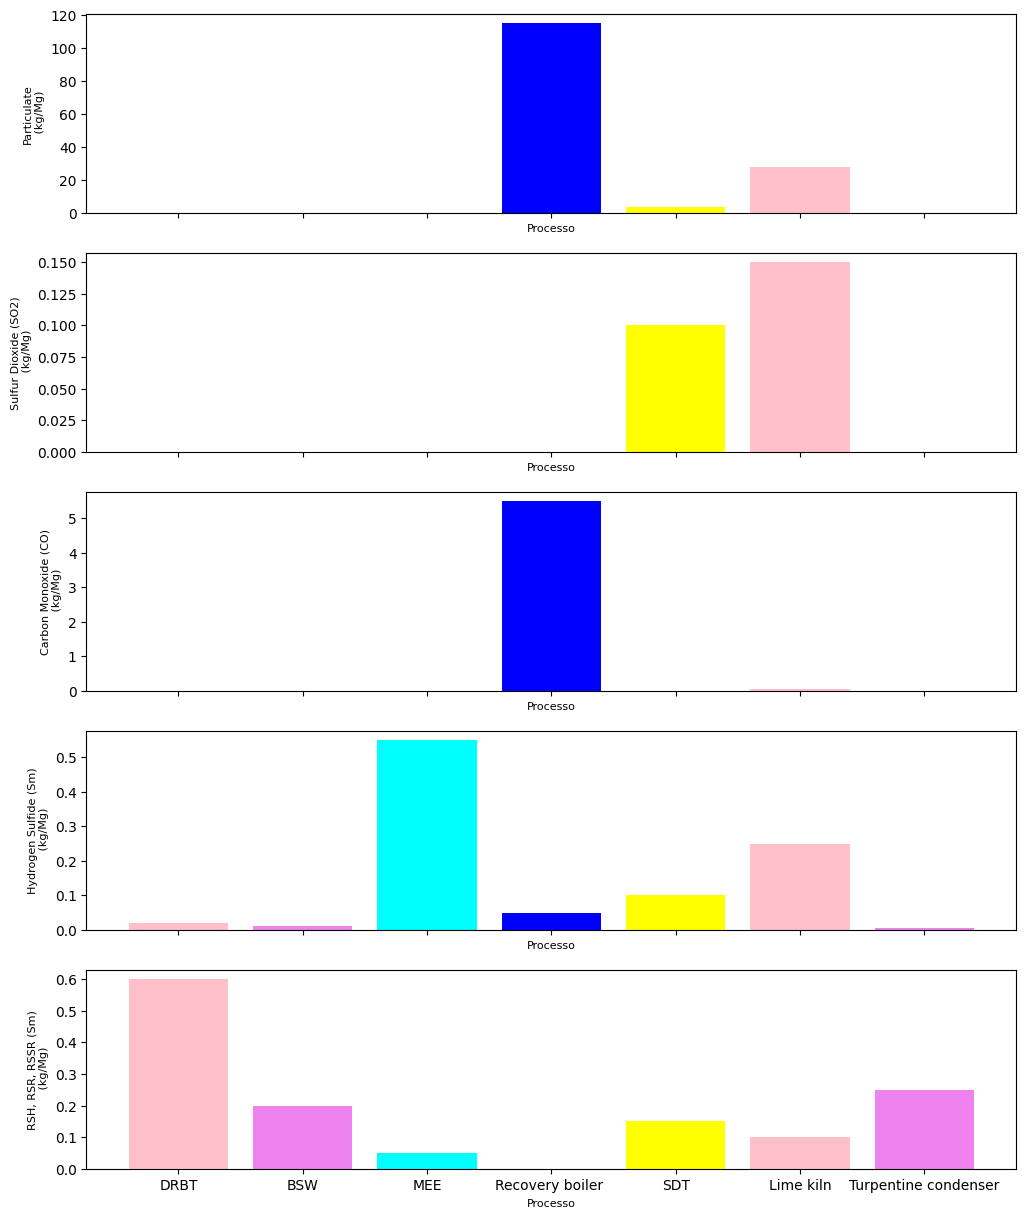

In [24]:
#plotando os fatores de emissão
import matplotlib.pyplot as plt

atv = 1000
emis = fe*atv

#somando dataframe
print(emis.sum())

#criando a figura com matplotlib
#criando subplots com numero de linhas igual ao numero de poluentes 
#sharex significa compartilhar o eixo x
fig,ax = plt.subplots(len(fe.columns)-1,1,sharex = True,figsize=(12, 15))

#loop para reencher o subplot com os graficos de barra
for ii in range(1,len(fe.columns)):
    print(ii)
    ax[ii-1].bar(fe['Source'],fe.iloc[:,ii], color=['pink', 'violet','cyan','blue','yellow'])
    ax[ii-1].set_xlabel('Processo', fontsize = 8)
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n (kg/Mg)', fontsize = 8) #inventei a unidade

#salvando a figura na pasta figures
#fig.savefig(cwd+'\\figures\\barplot_fatorEmiss.png')

## Criando Taxa de Atividade aleatória com sazonalidade
Nesta sessão nós criaremos uma taxa de atividade de um empreendimento qualquer que contenha sazonalidade ao longo dos meses do ano. Esta variabilidade também deve conter uma componente aleatória.

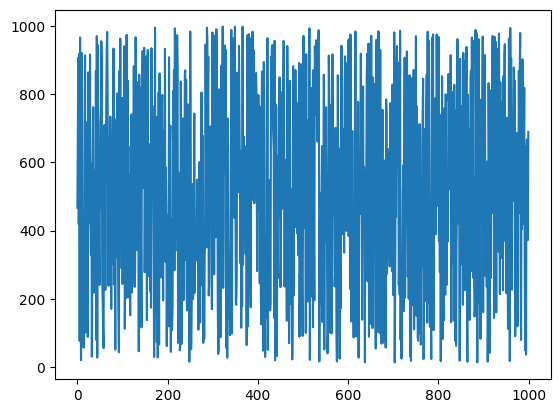

In [18]:
# Criando vetor de valores aleatórios
import numpy as np
atvMax = 1000 
atvMin = 12
n = 1000
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
#print(atv)

# Criando uma figura com os valores aleatórios
fig, ax= plt.subplots()
ax.plot(atv)

In [27]:
# Criando vetor de datas
import pandas as pd

# Criar um intervalo de datas
datas = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Criar um DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Data'].dt.month

# Mostrar o DataFrame resultante
print(df)

          Data  Mes
0   2024-01-01    1
1   2024-01-02    1
2   2024-01-03    1
3   2024-01-04    1
4   2024-01-05    1
..         ...  ...
361 2024-12-27   12
362 2024-12-28   12
363 2024-12-29   12
364 2024-12-30   12
365 2024-12-31   12

[366 rows x 2 columns]


In [28]:
# Ajustar meus números aleatórios com base no comprimento do vetor de datas

# Criando dataframe com datas e valores de atividade aleatória
import pandas as pd
# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Criando atividade aleatória
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
df['atividade'] = atv
#print(atv)
print(df)
df.to_csv(r"C:\Users\BiaBN\OneDrive\Documentos\controledepoluicaoatm\tabelas\FE\ativ.csv")


# Criando uma figura com os valores aleatórios
#fig, ax= plt.subplots()
#ax.plot(datas, atv)

          Data  Mes   atividade
0   2024-01-01    1   65.475212
1   2024-01-02    1  906.445682
2   2024-01-03    1  933.461186
3   2024-01-04    1  989.125498
4   2024-01-05    1  825.282508
..         ...  ...         ...
361 2024-12-27   12  684.095920
362 2024-12-28   12  722.292386
363 2024-12-29   12  841.777153
364 2024-12-30   12  787.261071
365 2024-12-31   12  375.196729

[366 rows x 3 columns]


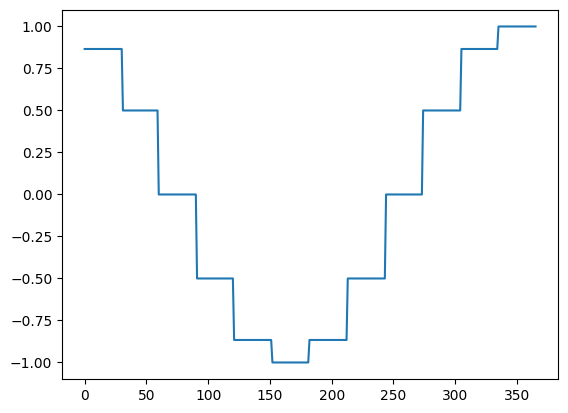

In [29]:
# Criando componente sazonal

sazonalidade = np.cos((2*np.pi)*df['Mes']/12)
plt.plot(sazonalidade)
df['sazonalidade'] = sazonalidade + 1
df.to_csv(r"C:\Users\BiaBN\OneDrive\Documentos\controledepoluicaoatm\tabelas\FE\ativ.csv")

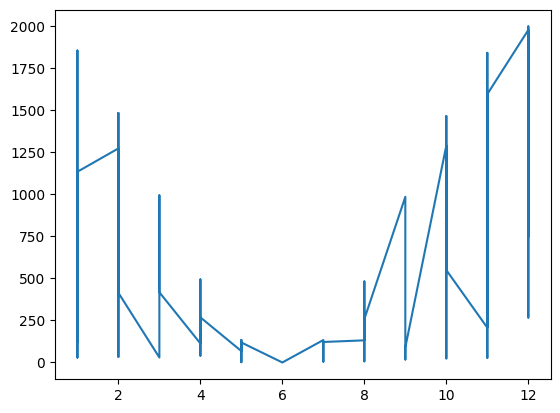

In [30]:
# Valores aleatórios com sazonalidade

df['aleatorioSazonal'] = df['atividade'] * df['sazonalidade'] 

plt.plot(df['Mes'], df['aleatorioSazonal'])